<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Scale/S07_Analyzing_proximity_with_apply_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **07 Scale**  Analyzing proximity with apply functions

```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                The Gensler Family AAP NYC Center
                Fall 2023
                Monday 3:30 PM to 6 PM

    Instructor  Brian Ho
                brian@brian-ho.io
```

This notebook is a quick demonstration of how you can analyze proximity of objects in one dataset to another, and return the result in an `apply()` function.

In [1]:
# Connect to Google Drive
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Set the path to the data directory
DATA_DIRECTORY = '/content/drive/MyDrive/Cornell AAP - MSAUD/ARCH 6131/Example Data'

In [9]:
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

To do this, let's use two datasets:
1. The sample vacant lots in Brooklyn ([link](https://github.com/brian-ho/intro-to-urban-data/blob/main/example_data/brooklyn_city_vacant_lots.geojson))

2. A set of trees in Brooklyn ([link](https://github.com/brian-ho/intro-to-urban-data/blob/main/example_data/trees.geojson))

Assume that we want to add to each lot a column which indicates how many trees are within 2,500 feet. Let's start by loading in the data.

In [32]:
vacant_lots_gdf = gpd.read_file(Path(DATA_DIRECTORY) / 'brooklyn_city_vacant_lots.geojson')
trees_gdf = gpd.read_file(Path(DATA_DIRECTORY) / 'trees.geojson')

In [33]:
print(f'There are {len(vacant_lots_gdf)} vacant lots, in {vacant_lots_gdf.crs.name}.')
print(f'There are {len(trees_gdf)} trees, in {trees_gdf.crs.name}.')

There are 1008 vacant lots, in WGS 84.
There are 10000 trees, in WGS 84.


Since we want to buffer in feet, we need to re-project this data to the right CRS.

<Axes: >

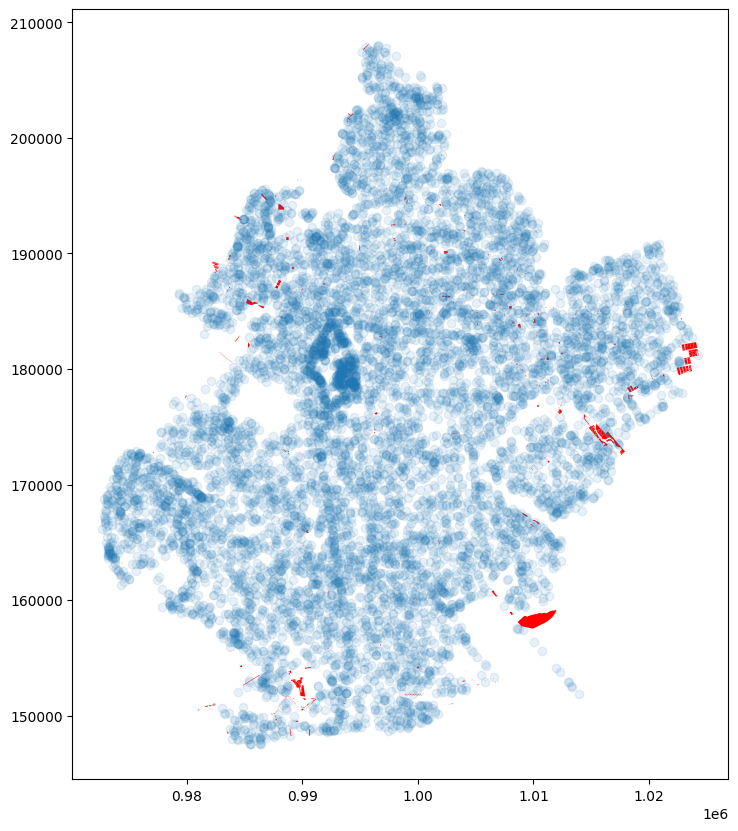

In [35]:
vacant_lots_gdf.to_crs(2263, inplace=True)
trees_gdf.to_crs(2263, inplace=True)

_, ax = plt.subplots(figsize=(10, 10))
vacant_lots_gdf.plot(ax=ax, color='red')
trees_gdf.plot(ax=ax, alpha=0.1)

OK! So counting the number of trees can be done with an `apply()` function on the vacant lots dataset, referencing the trees dataset. We'll want to see how many trees intersect an area buffered out from each lot.

While we could do the buffering in the apply function, this is actually pretty slow. It's faster if we pre-buffer the geometry in a GeoDataFrame and use it directly. Then, it's as simple as using the `intersects()` method to get a filtered list of trees we can count.

In [25]:
buffered_lots_gdf = vacant_lots_gdf.copy()
buffered_lots_gdf['geometry'] = buffered_lots_gdf['geometry'].buffer(2500)

def count_trees(geom):
    trees_near_lot = trees_gdf[trees_gdf['geometry'].intersects(geom)]
    return len(trees_near_lot)

That's it — just have to run it and look at the results.

In [27]:
vacant_lots_gdf['trees_near_lot'] = buffered_lots_gdf['geometry'].apply(count_trees)
vacant_lots_gdf['trees_near_lot'].describe()

count    1008.000000
mean      102.217262
std        41.657890
min         3.000000
25%        71.750000
50%       105.500000
75%       135.000000
max       321.000000
Name: trees_near_lot, dtype: float64

<Axes: >

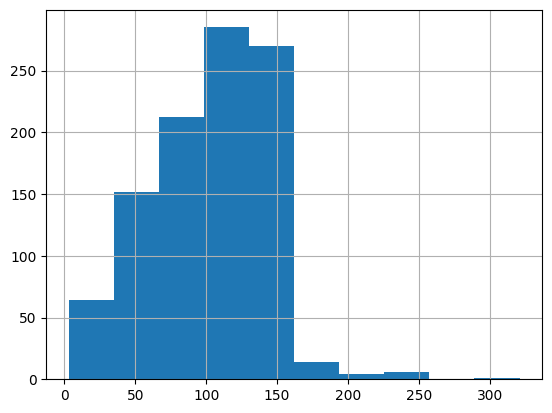

In [29]:
vacant_lots_gdf['trees_near_lot'].hist()

<Axes: >

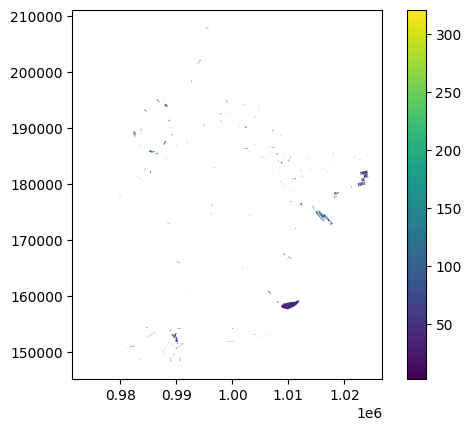

In [28]:
vacant_lots_gdf.plot(column='trees_near_lot', legend=True)

Looks good — as simple as that!

In [30]:
vacant_lots_gdf

,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,...,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry,trees_near_lot
0,BK,199,100,302,3000301,30003015000,3.01,5002,13,1,...,1,23v2,NaN,40.696810,-73.999888,NaN,0.0,68050.980090,"POLYGON ((984282.760 193230.477, 984293.276 19...",106
1,BK,314,42,306,3004700,30047001003,47,1002,15,39,...,NaN,23v2,t,40.687326,-74.002077,NaN,0.0,998.300417,"POLYGON ((983692.535 189708.212, 983682.141 18...",101
2,BK,330,4,306,3005100,30051001002,51,1002,15,39,...,NaN,23v2,t,40.685240,-74.002297,NaN,0.0,2031.729951,"POLYGON ((983663.676 188920.491, 983656.658 18...",104
3,BK,330,112,306,3005100,30051001002,51,1002,15,39,...,NaN,23v2,t,40.685295,-74.002055,NaN,0.0,386.532939,"POLYGON ((983692.982 188954.247, 983686.335 18...",102
4,BK,340,1,306,3005303,30053031000,53,1000,15,39,...,1,23v2,t,40.684793,-74.006580,NaN,0.0,1062.265150,"POLYGON ((982428.318 188739.603, 982408.606 18...",60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,BK,8866,5540,315,3062800,30628004027,628,4033,22,46,...,1,23v2,t,40.586728,-73.926218,NaN,0.0,4492.011509,"MULTIPOLYGON (((1004642.954 153192.816, 100465...",24
1004,BK,8876,2850,315,3062800,30628004025,628,4036,22,46,...,1,23v2,NaN,40.588351,-73.927570,NaN,0.0,74.447124,"POLYGON ((1004363.346 153662.745, 1004373.224 ...",28
1005,BK,8876,5545,315,3062800,30628004025,628,4036,22,46,...,1,23v2,t,40.587920,-73.927481,NaN,0.0,683.346874,"MULTIPOLYGON (((1004410.105 153558.129, 100440...",28
1006,BK,8883,530,315,3062800,30628001013,628,1028,22,46,...,1,23v2,t,40.588972,-73.928639,NaN,0.0,1449.231933,"MULTIPOLYGON (((1004009.531 153953.559, 100406...",40
